In [1]:
import torch
from torch.utils.data import DataLoader
from mymodel import *

In [2]:
dset_trn = SceneInstanceDataset(
    instance_dir='C:/Users/Hanna/Desktop/geom_survey/cars_train/1ba30d64da90ea05283ffcfc40c29975/',
    instance_idx=0,
    specific_observation_idcs=None,
    img_sidelength=64,
    num_images=-1)

data_loader = DataLoader(dset_trn, batch_size=2)

my_model = MySRN()
my_model.train()
my_model.to(device)

dset_val = SceneInstanceDataset(
    instance_dir='C:/Users/Hanna/Desktop/geom_survey/cars_train/1ba30d64da90ea05283ffcfc40c29975/',
    instance_idx=0,
    specific_observation_idcs=None,
    img_sidelength=64,
    num_images=1)
val_data_loader = DataLoader(dset_val, batch_size=2)

ckpt_path = 'C:/Users/Hanna/Desktop/geom_survey/checkpoint/logs/checkpoints/epoch_0801_iter_100125.pth'
# '/content/gdrive/My Drive/RESEARCH/geom_survey/data/checkpoint/'
if ckpt_path is not None:
    print('Loading model from %s', ckpt_path)
    custom_load(my_model,
          path=ckpt_path)

logging_root = 'C:/Users/Hanna/Desktop/geom_survey/checkpoint/logs'
ckpt_dir = os.path.join(logging_root, 'checkpoints')
events_dir = os.path.join(logging_root, 'events')

cond_mkdir(logging_root)
cond_mkdir(ckpt_dir)
cond_mkdir(events_dir)

# Save command-line parameters log directory.
# with open(os.path.join(logging_root, "params.txt"), "w") as out_file:
#     out_file.write('\n'.join(["%s: %s" % (key, value) for key, value in vars(opt).items()]))

# Save text summary of model into log directory.
with open(os.path.join(logging_root, "model.txt"), "w") as out_file:
    out_file.write(str(my_model))


Loading model from %s C:/Users/Hanna/Desktop/geom_survey/checkpoint/logs/checkpoints/epoch_0801_iter_100125.pth


In [3]:
start_step = 0
steps_til_val = 1000      #Number of iterations until validation set is run
steps_til_ckpt = 10000    #Number of iterations until checkpoint is saved
l1_weight = 200.0
reg_weight = 1e-3

iter = start_step
epoch = iter // len(dset_trn)
step = 0

In [4]:
optim = torch.optim.Adam(my_model.parameters(), lr = 5e-5)

while epoch <= 1:
    for d in data_loader:

        optim.zero_grad()
        image_pred = my_model(d)

        img_loss = my_model.get_image_loss(image_pred, d['rgb'])
        regu_loss = my_model.get_regularization_loss(image_pred, d['rgb'])

        weighted_img_loss = l1_weight * img_loss
        weighted_regu_loss = reg_weight *regu_loss

        total_loss = img_loss + regu_loss

        total_loss.backward()
        optim.step()

        if iter % steps_til_val == 0:
            print('Running validation set...')

            my_model.eval()
            with torch.no_grad():
                dist_losses = []
                for val in val_data_loader:
                  break
                image_pred = my_model(val)
                #print(type(prediction))

                dist_loss = my_model.get_image_loss(image_pred, val['rgb']).cpu().numpy()
                dist_losses.append(dist_loss)

                my_model.train()
        iter += 1
        step += 1

        if iter % steps_til_ckpt == 0:
            custom_save(my_model,
                os.path.join(ckpt_dir, 'epoch_%04d_iter_%06d.pth' % (epoch, iter)),
                discriminator=None,
                optimizer=optim)
    epoch += 1

custom_save(my_model,
      os.path.join(ckpt_dir, 'epoch_%04d_iter_%06d.pth' % (epoch, iter)),
      discriminator=None,
      optimizer=optim)


.865123
Raymarch step 3: Min depth 0.731889, max depth 1.211999
Raymarch step 4: Min depth 0.917968, max depth 1.473279
Raymarch step 5: Min depth 1.039104, max depth 1.823707
Raymarch step 6: Min depth 1.024803, max depth 2.224457
Raymarch step 7: Min depth 1.041644, max depth 2.672472
Raymarch step 8: Min depth 1.045480, max depth 3.173069
Raymarch step 9: Min depth 1.042327, max depth 3.729651
Raymarch step 0: Min depth 0.048303, max depth 0.051756
Raymarch step 1: Min depth 0.264114, max depth 0.359359
Raymarch step 2: Min depth 0.535983, max depth 0.751456
Raymarch step 3: Min depth 0.786676, max depth 1.143295
Raymarch step 4: Min depth 0.883168, max depth 1.375378
Raymarch step 5: Min depth 0.866301, max depth 1.662259
Raymarch step 6: Min depth 0.885674, max depth 2.052123
Raymarch step 7: Min depth 0.880533, max depth 2.497566
Raymarch step 8: Min depth 0.895298, max depth 2.955130
Raymarch step 9: Min depth 0.895038, max depth 3.464233
Raymarch step 0: Min depth 0.048051, max

In [5]:
import matplotlib.pyplot as plt
# for d in data_loader:
#     break
# print(d)
#pred_image = my_model(d)

# d = data_loader
# for _ in range(5):    
#     pred_image = my_model(d.next())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Raymarch step 0: Min depth 0.048083, max depth 0.052506
Raymarch step 1: Min depth 0.224008, max depth 0.296919
Raymarch step 2: Min depth 0.455062, max depth 0.649265
Raymarch step 3: Min depth 0.669099, max depth 1.019783
Raymarch step 4: Min depth 0.833670, max depth 1.242685
Raymarch step 5: Min depth 0.955070, max depth 1.627691
Raymarch step 6: Min depth 0.961120, max depth 2.055879
Raymarch step 7: Min depth 0.961379, max depth 2.492657
Raymarch step 8: Min depth 0.960850, max depth 2.938609
Raymarch step 9: Min depth 0.960832, max depth 3.393685


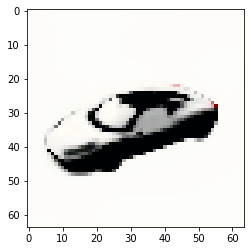

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Raymarch step 0: Min depth 0.048134, max depth 0.052148
Raymarch step 1: Min depth 0.196558, max depth 0.300089
Raymarch step 2: Min depth 0.376896, max depth 0.642957
Raymarch step 3: Min depth 0.550063, max depth 0.969911
Raymarch step 4: Min depth 0.728210, max depth 1.296927
Raymarch step 5: Min depth 0.936302, max depth 1.663467
Raymarch step 6: Min depth 0.916271, max depth 2.087269
Raymarch step 7: Min depth 0.922704, max depth 2.503420
Raymarch step 8: Min depth 0.918814, max depth 2.917832
Raymarch step 9: Min depth 0.922758, max depth 3.331287


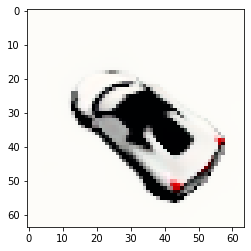

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Raymarch step 0: Min depth 0.048105, max depth 0.051902
Raymarch step 1: Min depth 0.268049, max depth 0.455004
Raymarch step 2: Min depth 0.526172, max depth 0.922968
Raymarch step 3: Min depth 0.780259, max depth 1.242877
Raymarch step 4: Min depth 0.837150, max depth 1.462171
Raymarch step 5: Min depth 0.851169, max depth 1.781044
Raymarch step 6: Min depth 0.852538, max depth 2.157381
Raymarch step 7: Min depth 0.859719, max depth 2.578922
Raymarch step 8: Min depth 0.867955, max depth 3.055079
Raymarch step 9: Min depth 0.868020, max depth 3.560755


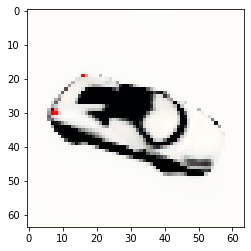

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Raymarch step 0: Min depth 0.048143, max depth 0.051848
Raymarch step 1: Min depth 0.214865, max depth 0.300238
Raymarch step 2: Min depth 0.420957, max depth 0.654398
Raymarch step 3: Min depth 0.602000, max depth 1.036663
Raymarch step 4: Min depth 0.765747, max depth 1.248326
Raymarch step 5: Min depth 0.937904, max depth 1.638625
Raymarch step 6: Min depth 0.944635, max depth 2.078592
Raymarch step 7: Min depth 0.945631, max depth 2.539069
Raymarch step 8: Min depth 0.943924, max depth 3.016370
Raymarch step 9: Min depth 0.944396, max depth 3.496434


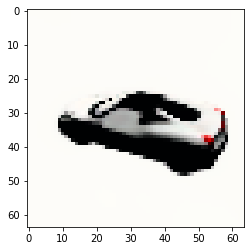

In [6]:
for i, d in enumerate(data_loader):
    if i < 4:
        pred_image = my_model(d)
        plt.imshow(pred_image[0, :, :].reshape(64, 64, 3).detach().cpu().numpy())

        
        plt.show()

In [8]:
for d in data_loader:
    break
print(d)

{'instance_idx': tensor([0., 0.]), 'rgb': tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]), 'pose': tensor([[[-5.0426e-01, -3.7588e-01,  7.7745e-01, -1.0107e+00],
         [-8.6355e-01,  2.1949e-01, -4.5399e-01,  5.9018e-01],
         [-5.9605e-08, -9.0030e-01, -4.3527e-01,  5.6585e-01],
         [ 0.0000e+00,  0.0000e+00, -0.0000e+00,  1.0000e+00]],

        [[ 4.9751e-01, -5.3313e-01,  6.8429e-01, -8.8958e-01],
         [-8.6746e-01, -3.0577e-01,  3.9246e-01, -5.1020e-01],
         [ 1.6391e-07, -7.8885e-01, -6.1459e-01,  7.9897e-01],
         [-0.0000e+00,  0.0000e+00, -0.0000e+00,  1.0000e+00]]]), 'uv': tensor([[[ 0,  0],
         [ 1,  0],
         [ 2,  0],
         ...,
         [61, 63],
         [62, 63],
         [63, 63]

In [9]:
d['pose']

tensor([[[-5.0426e-01, -3.7588e-01,  7.7745e-01, -1.0107e+00],
         [-8.6355e-01,  2.1949e-01, -4.5399e-01,  5.9018e-01],
         [-5.9605e-08, -9.0030e-01, -4.3527e-01,  5.6585e-01],
         [ 0.0000e+00,  0.0000e+00, -0.0000e+00,  1.0000e+00]],

        [[ 4.9751e-01, -5.3313e-01,  6.8429e-01, -8.8958e-01],
         [-8.6746e-01, -3.0577e-01,  3.9246e-01, -5.1020e-01],
         [ 1.6391e-07, -7.8885e-01, -6.1459e-01,  7.9897e-01],
         [-0.0000e+00,  0.0000e+00, -0.0000e+00,  1.0000e+00]]])

In [10]:
d['pose'].shape

torch.Size([2, 4, 4])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Raymarch step 0: Min depth 0.047924, max depth 0.052113
Raymarch step 1: Min depth 0.227615, max depth 0.306726
Raymarch step 2: Min depth 0.473992, max depth 0.677765
Raymarch step 3: Min depth 0.710392, max depth 1.064873
Raymarch step 4: Min depth 0.911737, max depth 1.397627
Raymarch step 5: Min depth 0.937116, max depth 1.870390
Raymarch step 6: Min depth 0.956369, max depth 2.357056
Raymarch step 7: Min depth 0.956304, max depth 2.843272
Raymarch step 8: Min depth 0.953983, max depth 3.334070
Raymarch step 9: Min depth 0.955593, max depth 3.833152


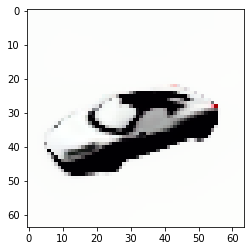

In [13]:
d1 = d
d1['pose'] = d1['pose'] + 0.001
pred_image1 = my_model(d1)

plt.imshow(pred_image1[0, :, :].reshape(64, 64, 3).detach().cpu().numpy())

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Raymarch step 0: Min depth 0.048209, max depth 0.051717
Raymarch step 1: Min depth 0.233616, max depth 0.314541
Raymarch step 2: Min depth 0.468953, max depth 0.680300
Raymarch step 3: Min depth 0.684045, max depth 1.055416
Raymarch step 4: Min depth 0.853486, max depth 1.272518
Raymarch step 5: Min depth 0.973552, max depth 1.665235
Raymarch step 6: Min depth 0.982230, max depth 2.075588
Raymarch step 7: Min depth 0.985605, max depth 2.494527
Raymarch step 8: Min depth 0.985497, max depth 2.916101
Raymarch step 9: Min depth 0.984805, max depth 3.342230


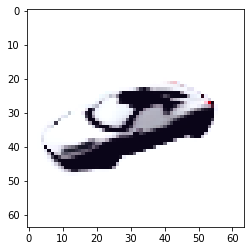

In [16]:
d2 = d
d2['pose'] = d2['pose'] - 0.002
pred_image2 = my_model(d2)

plt.imshow(pred_image2[0, :, :].reshape(64, 64, 3).detach().cpu().numpy())

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Raymarch step 0: Min depth 0.048249, max depth 0.052109
Raymarch step 1: Min depth 0.219766, max depth 0.295832
Raymarch step 2: Min depth 0.453375, max depth 0.653197
Raymarch step 3: Min depth 0.666325, max depth 1.019931
Raymarch step 4: Min depth 0.835374, max depth 1.230070
Raymarch step 5: Min depth 0.930929, max depth 1.620506
Raymarch step 6: Min depth 0.940265, max depth 2.025640
Raymarch step 7: Min depth 0.942481, max depth 2.438748
Raymarch step 8: Min depth 0.942283, max depth 2.855937
Raymarch step 9: Min depth 0.942140, max depth 3.279751


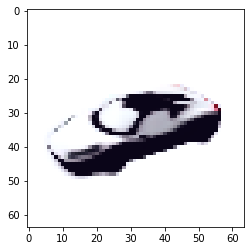

In [17]:
d2 = d
d2['pose'] = d2['pose'] + 0.01
pred_image2 = my_model(d2)

plt.imshow(pred_image2[0, :, :].reshape(64, 64, 3).detach().cpu().numpy())

plt.show()

In [18]:
d2['pose'] = torch.rand(2, 4, 4)
print(d2['pose'])

tensor([[[0.5516, 0.4503, 0.3336, 0.6474],
         [0.9984, 0.5489, 0.9500, 0.5955],
         [0.5978, 0.2960, 0.1761, 0.7151],
         [0.3053, 0.5579, 0.8237, 0.7501]],

        [[0.6866, 0.9579, 0.4776, 0.9539],
         [0.5273, 0.3858, 0.2316, 0.4943],
         [0.5136, 0.3973, 0.3366, 0.5807],
         [0.5593, 0.6136, 0.4351, 0.7858]]])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Raymarch step 0: Min depth 0.048195, max depth 0.051805
Raymarch step 1: Min depth -8.105263, max depth 11.113104
Raymarch step 2: Min depth -10.855299, max depth 34.062225
Raymarch step 3: Min depth -12.824072, max depth 57.915932
Raymarch step 4: Min depth -14.064261, max depth 81.757942
Raymarch step 5: Min depth -14.961502, max depth 105.496002
Raymarch step 6: Min depth -15.992082, max depth 129.328430
Raymarch step 7: Min depth -17.966179, max depth 153.322388
Raymarch step 8: Min depth -21.016533, max depth 177.524902
Raymarch step 9: Min depth -24.172768, max depth 202.225311


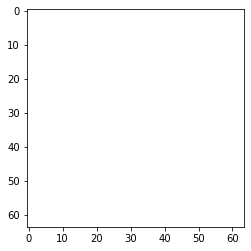

In [19]:
pred_image2 = my_model(d2)

plt.imshow(pred_image2[0, :, :].reshape(64, 64, 3).detach().cpu().numpy())

plt.show()